In [2]:
from imutils.paths import list_images
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
import cv2, os
import shutil

In [3]:
dataset_path = '../AI_study/dataset/beaf'

train_dataset = f'{dataset_path}/train'
test_dataset  = f'{dataset_path}/test'

train_csv = pd.read_csv(f'{train_dataset}/grade_labels.csv')
train_csv.head()

,imname,grade
0,cow_1++_4567.jpg,1++
1,cow_2_1390.jpg,2
2,cow_1++_2581.jpg,1++
3,cow_2_1689.jpg,2
4,cow_3_3287.jpg,3


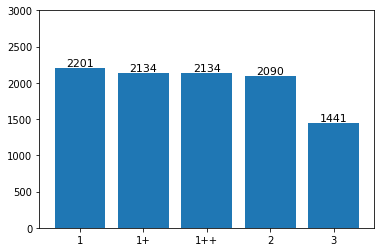

In [4]:
## 레이블 별 데이터 갯수를 확인하는 코드
label_count = Counter(list(train_csv['grade']))
label_count = dict(sorted(label_count.items()))

## 레이블 별 데이터 분포를 시각화 시키는 코드
plt.bar(label_count.keys(), label_count.values())
plt.ylim(0, 3000)

for grade, num in label_count.items():
    plt.text(
                grade, num, num,
                fontsize = 11, color = 'black',
                horizontalalignment = 'center',
                verticalalignment = 'bottom'
            )
plt.show()

In [5]:
## 이미지 데이터를 라벨별로 나누어주는 함수
def image_move(df, dtype = 'train'):
    for name, grade in zip(df['imname'], df['grade']):
        os.makedirs(f'dataset/{dtype}/{grade}', exist_ok = True)
        shutil.copy(f'{train_dataset}/images/{name}', f'dataset/{dtype}/{grade}/{name}')
        
## 학습용 이미지 데이터 이동
image_move(train_csv)

before preprocessed :48.77548566544496


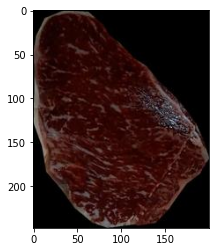

In [78]:
## 원본 이미지가 어두운 경우 밝게 만들어주는 코드
image = cv2.imread('dataset/train/1/cow_1_14.jpg')

## 원본 이미지 opencv로 이미지를 불러올때는 BGR로 불러와지므로, 이미지 색상을 RGB로 변경
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## 10보다 큰 픽셀값의 평균을 확인
print(f'before preprocessed :{np.mean(image[image > 10])}')

## 어두운 원본 이미지
plt.imshow(image)

after preprocessed : 60.716028225806454


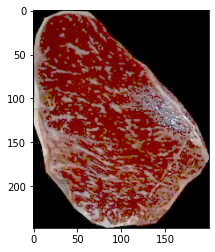

In [79]:
## 픽셀값이 10보다 큰 경우에는 픽셀값에 80씩 더해줌. (밝게 만들어줌.)
#! 전체가 아닌 10보다 큰 경우에만 더해주는 이유는 검정색 마스킹 부분은 그대로 두게하기 위해
#! 더해주는 값을 조절해가면서 적절한 값을 찾아봐야 할듯
image[image > 10] += 80
print(f'after preprocessed : {np.mean(image)}')

## 어두운 이미지를 밝게 만든 이미지
plt.imshow(image)

(248, 200, 3)
68.85141516666155


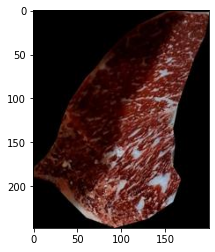

In [89]:
## 이미지가 반만 어두운 경우가 좀 애매함 
image2 = cv2.imread('dataset/train/1++/cow_1++_1173.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
print(np.mean(image2[image2 > 10]))

## 원본 이미지
plt.imshow(image2)

108.78625544445126


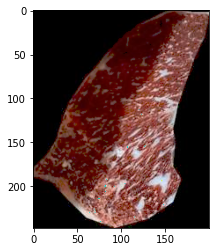

In [90]:
## 80을 더해주면 이미지가 깨져서 40으로 낮춤.
#! 어두운 부분은 그렇게 많이 밝아지지 않음.
image2[(image2 > 10)] += 40
print(np.mean(image2[image2 > 10]))

## 밝게 만든 이미지
plt.imshow(image2)

92.03529041067115


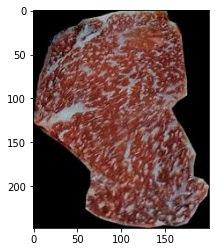

In [87]:
## 원래 밝은 이미지 
image3 = cv2.imread('dataset/train/1++/cow_1++_1738.jpg')
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
print(np.mean(image3[image3 > 10]))

plt.imshow(image3)

In [94]:
datas = []
image_paths = sorted(list_images(f'dataset/train'))
for idx, image_path in enumerate(image_paths, 1):
    # folder_name, file_name = image_path.split(os.path.sep)[-2:]
    # os.makedirs(f'prep/{folder_name}', exist_ok = True)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    pixel_mean = np.mean(image[image > 10])
    text = f'[{idx}] image path : {image_path}, \
            \nmean : {pixel_mean:.2f}\n'
    print(text)

    if pixel_mean < 50: image[image > 10] += 75
    elif (pixel_mean >= 50) and (pixel_mean < 80): image[image > 10] += 40
    else: pass 

    datas.append([file_name, folder_name, pixel_mean])
    # cv2.imwrite(f'prep/{folder_name}/{file_name}', image)

df = pd.DataFrame(datas, columns=['file_name', 'grade', 'score'])
df.to_csv('datas.csv', sep=',')

[1] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_100-checkpoint.jpg,             
mean : 77.39

[2] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1014-checkpoint.jpg,             
mean : 67.05

[3] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1140-checkpoint.jpg,             
mean : 98.28

[4] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1173-checkpoint.jpg,             
mean : 68.85

[5] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1190-checkpoint.jpg,             
mean : 70.89

[6] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1332-checkpoint.jpg,             
mean : 73.82

[7] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1478-checkpoint.jpg,             
mean : 29.45

[8] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1536-checkpoint.jpg,             
mean : 58.06

[9] image path : dataset/train/1++/.ipynb_checkpoints/cow_1++_1575-checkpoint.jpg,             
mean : 58.36

[10] image 